In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from vaexede.load_models import load_model
from vaexede.preprocess import preprocess, unpreprocess

2025-03-21 15:57:51.630900: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-21 15:57:51.632757: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 15:57:51.658461: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-21 15:57:51.658479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-21 15:57:51.659119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
model = 'lcdm' # either 'lcdm' or 'ede'
lcdm_model = load_model(model) # load the trained network

# add your unitless D_ell temperature spectrum here, in the ell range [30, 2500]
# D_ell = C_ell * ell * (ell+1) / 2pi
input_spectrum = np.load('./trained_models/DlTT_LCDM_ref.npy')[30:] # to crop between 30 and 2500

# and preprocess it as described in the paper
input_spectrum_preprocess = preprocess(input_spectrum, model)

# here the preprocessed spectrum gets encoded, samples from the latent space are obtained
# then the spectrum is decoded and unpreprocessed
mean, logvar = lcdm_model.encode(input_spectrum_preprocess.reshape(1, -1))
z = lcdm_model.reparameterize(mean, logvar) # here we sample from the latent distribution
decoded_spectrum = lcdm_model.decode(z)
output_spectrum_lcdm = unpreprocess(decoded_spectrum[0, :, 0], model)

2025-03-21 15:57:53.603347: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-21 15:57:53.603841: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
# repeat with ede
model = 'ede' # either 'lcdm' or 'ede'
ede_model = load_model(model) # load the trained network

# spectrum has to be preprocessed differently, since it's another VAE
input_spectrum_preprocess = preprocess(input_spectrum, model)

# here the preprocessed spectrum gets encoded, samples from the latent space are obtained
# then the spectrum is decoded and unpreprocessed
mean, logvar = ede_model.encode(input_spectrum_preprocess.reshape(1, -1))
z = ede_model.reparameterize(mean, logvar) # here we sample from the latent distribution
decoded_spectrum = ede_model.decode(z)
output_spectrum_ede = unpreprocess(decoded_spectrum[0, :, 0], model)

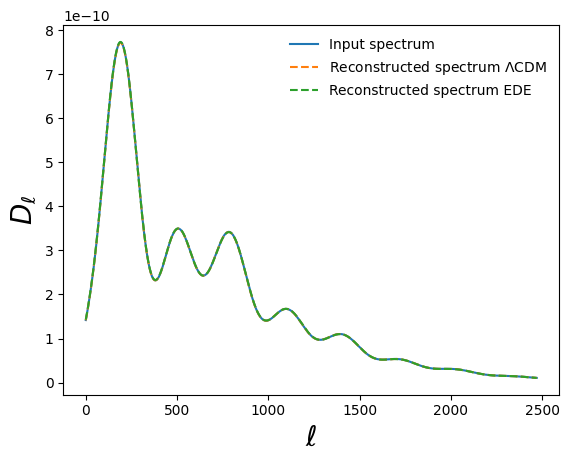

In [4]:
# finally plot all results
plt.plot(input_spectrum, label='Input spectrum')
plt.plot(output_spectrum_lcdm, label='Reconstructed spectrum $\Lambda$CDM', ls='--')
plt.plot(output_spectrum_ede, label='Reconstructed spectrum EDE', ls='--')
plt.xlabel('$\ell$', fontsize=20)
plt.ylabel('$D_{\ell}$', fontsize=20)
plt.legend(frameon=False);